# 2 keras models
### Following the mnist tutorial linked from previous notebook
Build and train a model to predict handwritten digits from mnist dataset.  
The typical Keras workflow looks just like this:
1. Define your training data: input tensors and target tensors.
2. Define a network of layers (or model ) that maps your inputs to your targets.
3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
4. Iterate on your training data by calling the fit() method of your model.

Great video [here](https://www.youtube.com/watch?v=5qCDzaOUCWA)

In [24]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [25]:
%matplotlib inline

In [37]:
# x_train[35]
print(f'Target on entity no. 35: {y_train[35]}')
print('\n\n\n')
print(f'Some rows from input on entity no 35: {x_train[35][10:15]}')

Target on entity no. 35: 5




Some rows from input on entity no 35: [[  0   0   0   0   0   0   0   0   0   0   0   0   0 141 226 170  57   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  86 255 198  29   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 198 255 141  86  57   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 170 255 198 114 226 170  29
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  57 198 255 114  29   0 141 255  29
    0   0   0   0   0   0   0   0   0   0]]


5


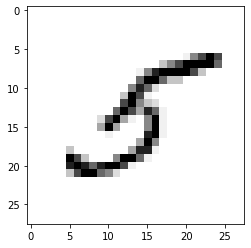

In [33]:
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print(y_train[35])

5


In [41]:
x_train.shape
#28*28

(60000, 28, 28)

In [49]:
# normalize data from 0-255 to 0-1
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (x_train_original, y_train_original), (x_test_original, y_test_original)
image_size = 28*28
x_train = x_train.reshape(x_train.shape[0],image_size) # x_train = (60000,784)
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.reshape(x_test.shape[0],image_size)
x_test = x_test.astype('float32')
x_test /= 255

x_train[35]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
from keras.utils import to_categorical # to get a one-hot incoding of the target data
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
# test out the to_categorical method
print(to_categorical([0],10))
print(to_categorical([1],10))
print(to_categorical([2],10))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


## Choosing layers for the model
From Deep learning with python p. 59:

Different layers are appropriate for different tensor formats and different types of data processing. For instance: 
1. simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers (the Dense class in Keras). 
2. Sequence data, stored in 3D tensors of shape (samples, timesteps, features), is typically processed by recurrent layers such as an LSTM layer.
3. Image data, stored in 4D tensors, is usually processed by 2D convolution layers (Conv2D).

Think of layers as the LEGO bricks of deep learning, a metaphor that is made explicit by frameworks like Keras. Building deep-learning models in Keras is done by clipping together compatible layers to form useful data-transformation pipelines. The notion of layer compatibility here refers specifically to the fact that every layer
will only accept input tensors of a certain shape and will return output tensors of a certain shape. Consider the following example from keras import layers: `layer = layers.Dense(32, input_shape=(784,))`  
A dense layer with 32 output units
We’re creating a layer that will only accept as input 2D tensors where the first dimen-
sion is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be
accepted). This layer will return a tensor where the first dimension has been trans-
formed to be 32.

Thus this layer can only be connected to a downstream layer that expects 32-
dimensional vectors as its input. When using Keras, you don’t have to worry about
compatibility, because the layers you add to your models are dynamically built to
match the shape of the incoming layer. For instance, suppose you write the following:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))
The second layer didn’t receive an input shape argument—instead, it automatically
inferred its input shape as being the output shape of the layer that came before.


In [10]:
from keras.models import Sequential
# model instance
model = Sequential()
# define each layer in the network
from keras.layers import Dense # the simplest layer type

input_layer = Dense(units=512,  # 512 units (nodes) is an arbitrary number (might be ajusted later up or down to see what gives most accuracy)
                activation='sigmoid', # activation is the activation function used to pass dot product of all inputs and weights through
                input_shape=(image_size, )) #28x28 for the mnist image size (must be an iterable, therefore the comma)

In [11]:
for i in (image_size,):
    print(i)
print(len((image_size,)))

784
1


In [12]:
# add hidden layer
model.add(input_layer)
# add another  hidden layer
model.add(Dense(units=512,activation='sigmoid'))

#model.add(Dense(units=48,activation='relu'))

# add an output layer
model.add(Dense(units=10, 
                activation='softmax', # softmax nonlinearity function for mapping the neural network activation to the categories
                #input_shape=(image_size,) # does not seem to be warranted
               ))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Now train the model
model.compile(loss='categorical_crossentropy', # loss is how to meassure how wrong the model is on its predictions
             optimizer='sgd', # "stochastic gradient descent" is a way to tell algorithm how to improve
             metrics=['accuracy'], # what do we care about in our model
             )
model.fit(x_train,
         y_train,
         epochs=5,
         verbose=True,
         validation_split=0.1) # checking periodically how well we are doing

Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 2.1417 - accuracy: 0.3331 - val_loss: 1.8759 - val_accuracy: 0.5585
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 1.4829 - accuracy: 0.6691 - val_loss: 1.0549 - val_accuracy: 0.8115
Epoch 3/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.8880 - accuracy: 0.7931 - val_loss: 0.6649 - val_accuracy: 0.8623
Epoch 4/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6449 - accuracy: 0.8375 - val_loss: 0.5005 - val_accuracy: 0.8797
Epoch 5/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.5326 - accuracy: 0.8588 - val_loss: 0.4211 - val_accuracy: 0.8955


### Note
- **Loss functions:** Different ways to calculate the difference between target and network output
- **Optimizers:** Multiple variants of Stocastic Gradient Descent (SGD) that differ by taking into account previous weight updates when computing the next weight update, rather than just looking at the current value of the gradients. There is, for instance, SGD with momentum, as well as Adagrad, RMSProp, and several others. Such variants are known as optimization methods or optimizers.
- **metrics:** What we are looking for when we optimize and readjust our model

In [14]:
y_train_original[0]

5

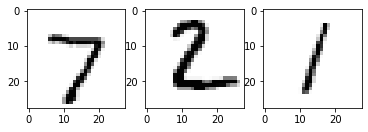

In [15]:
_, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(x_test_original[0], cmap='Greys')
ax2.imshow(x_test_original[1], cmap='Greys')
ax3.imshow(x_test_original[2], cmap='Greys')

In [16]:
results = model.evaluate(x_test, y_test)
print(f'test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model.predict(x_test[:3])
#print('predictions shape:', predictions.shape)
#print(predictions)
print('predict classes',model.predict_classes(x_test[:3]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.8755
test loss, test acc: [0.47166016697883606, 0.8755000233650208]

# Generate predictions for 3 samples
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predict classes [7 2 1]


## More complex model

In [17]:
from keras.utils import to_categorical
num_classes = 10
print(y_train.shape)
print('y_train first value',y_train[0])
# change the targets to one-hot-encoded
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_train[0])

(60000, 10)
y_train first value [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10, 10)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Documentation here
https://keras.io/getting-started/sequential-model-guide/

## using convolutional neural network for image classification with keras
https://www.machinecurve.com/index.php/2020/03/30/how-to-use-conv2d-with-keras/#what-are-convolutional-neural-networks

In [18]:
### more complex and more accurate model:


# reformat input
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test = x_test.astype('float32')
x_test /= 255

#reformat output
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

from keras import models
from keras import layers
model2 = models.Sequential()
# keras.layers.Conv2D(filters, kernel_size... filter is how many filters (windows of sub pixel set) kernel is the window size eg: 3x3 pixels
model2.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)))
model2.add(layers.MaxPool2D((2,2))) # Max Pooling to reduce the spatial dimensions of the output volume. pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal)
model2.add(layers.Conv2D(64,(3,3),activation='relu')) # does not need input_shape, since it gets it from previous layer
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation='relu'))
model2.add(layers.Flatten()) # rewrite tensor to single vector of values
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax')) # softmax is good for output layer because Softmax outputs probabilities range. The range will 0 to 1, and the sum of all the probabilities will be equal to one. If the softmax function used for multi-classification model it returns the probabilities of each class and the target class will have the high probability.

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [19]:
model2.compile(loss='categorical_crossentropy', # loss is how to meassure how wrong the model is on its predictions
             optimizer='rmsprop', # "stochastic gradient descent" is a way to tell algorithm how to improve
             metrics=['accuracy'], # what do we care about in our model
             )
model2.fit(x_train,
         y_train,
         epochs=5,
         verbose=True,
         batch_size=64,
         validation_split=0.1) # checking periodically how well we are doing

Epoch 1/5
844/844 [==============================] - 17s 21ms/step - loss: 0.1861 - accuracy: 0.9421 - val_loss: 0.0563 - val_accuracy: 0.9837
Epoch 2/5
844/844 [==============================] - 19s 22ms/step - loss: 0.0506 - accuracy: 0.9838 - val_loss: 0.0432 - val_accuracy: 0.9873
Epoch 3/5
844/844 [==============================] - 18s 21ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 4/5
844/844 [==============================] - 18s 22ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0346 - val_accuracy: 0.9902
Epoch 5/5
844/844 [==============================] - 18s 22ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0428 - val_accuracy: 0.9903


In [20]:
results = model2.evaluate(x_test, y_test)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model2.predict(x_test[:3])
#print('predictions shape:', predictions.shape)
print(predictions)
print('predict classes',model2.predict_classes(x_test[:3]))
print('actual:\n',y_test[:3])

313/313 [==============================] - 1s 4ms/step - loss: 0.0328 - accuracy: 0.9898
test loss, test acc: [0.03275664895772934, 0.989799976348877]

# Generate predictions for 3 samples
[[1.11108005e-10 4.40638592e-09 1.29602560e-08 1.29090779e-06
  3.69235892e-11 3.84837023e-10 5.82970141e-13 9.99998569e-01
  1.92453387e-09 1.71947605e-07]
 [2.66724580e-08 8.69351879e-09 1.00000000e+00 3.20984211e-11
  5.82322524e-11 3.48483500e-15 5.54748025e-09 2.43735641e-13
  2.86523565e-11 4.14181710e-12]
 [1.78395453e-07 9.99996781e-01 2.01180477e-08 2.04812167e-08
  9.06823516e-07 8.00246767e-07 1.26077964e-07 9.86727287e-07
  1.98000365e-07 8.21571646e-08]]
predict classes [7 2 1]
actual:
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
